In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests
import IPython.display as disp
import logging

p1 = .5
p2 = .51
min_trials = 10000 
alpha = .001
skew_url = 'https://www.cnet.com/a/img/resize/d85df57a1aa5881be3bfb4256a181aaf58d4d9ff/hub/2019/05/22/1b710a6b-5f4d-4987-a046-c23674b221a3/picard-meme-facepalm.jpg?auto=webp&fit=crop&height=675&precrop=1331,746,x109,y127&width=1200'    
no_skew_url = 'https://techcrunch.com/wp-content/uploads/2018/08/picard.png?w=1390&crop=1' 
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()

In [31]:
# helper functions

def generate_sample(p, n): 
    X1 = np.random.binomial(1, p, n)    
    sample_proportion = sum(X1)/n
    logger.info("sample proportion is: %d", sample_proportion ) 
    sample_var = sample_proportion * (1 - sample_proportion)
    logger.info("sample variance is: %d", sample_var ) 
    return sample_proportion, sample_var

def generate_pooled_SE(sample_var_1, sample_var_2, n1, n2):
    pooled_sample_var = ( ((n1 - 1) * sample_var_1) + ((n2 - 1) * sample_var_2) ) / (n1 + n2 - 2)
    logger.info("pooled sample variance is: %d", pooled_sample_var ) 
    sample_error = math.sqrt(pooled_sample_var/(n1+n2))
    logger.info("pooled sample error is: %d", sample_error ) 
    return sample_error

def generate_p_value_two_sided(X1, X2, SE):
    z_score = (X1 - X2) / SE
    logger.info("z score is %d", z_score)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    logger.info("p value is: %d", p_value ) 
    return p_value

def disable_logging():
    logger.setLevel(logging.CRITICAL)

def enable_logging():
    logger.setLevel(logging.INFO)

 

INFO:root:sample proportion is: 0
INFO:root:sample variance is: 0
INFO:root:sample proportion is: 0
INFO:root:sample variance is: 0
INFO:root:pooled sample variance is: 0
INFO:root:pooled sample error is: 0
INFO:root:z score is -3
INFO:root:p value is: 0
INFO:root:skew detected


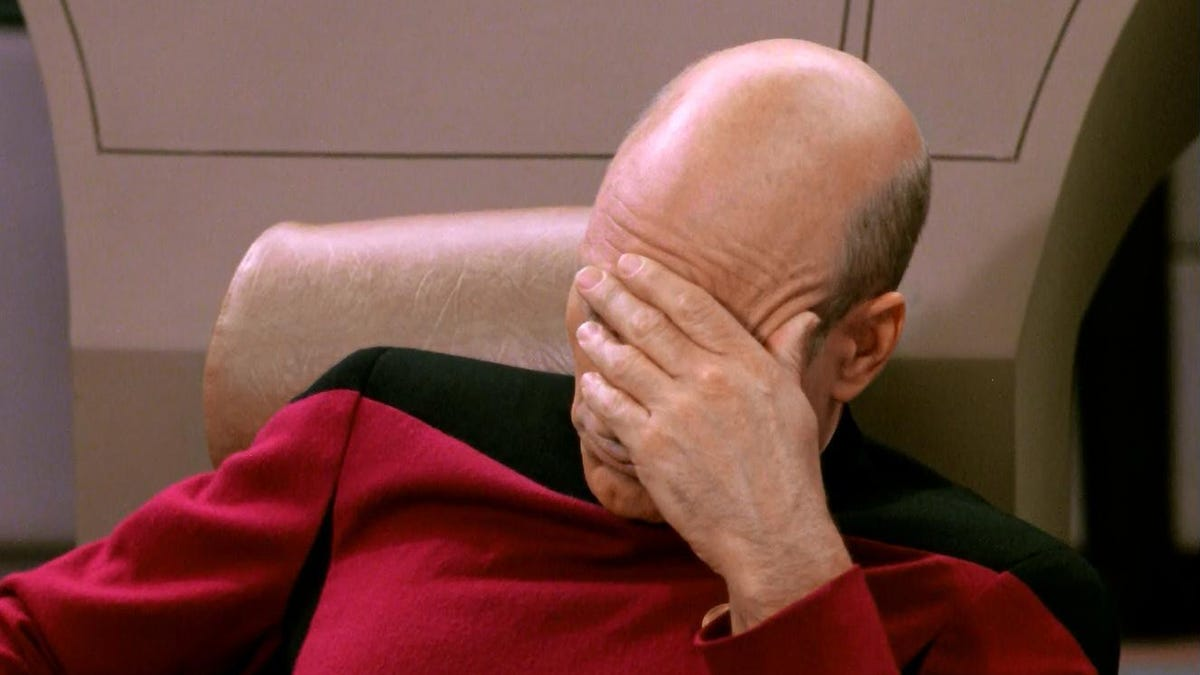

In [33]:
# Try it out as a one off ! 
enable_logging()

# take some samples
sample_proportion_1, sample_var_1 = generate_sample(p1, min_trials)
sample_proportion_2, sample_var_2 = generate_sample(p2, min_trials)

# Poool the variance and get the sample error
sample_error = generate_pooled_SE(sample_var_1, sample_var_2, min_trials, min_trials)

# grab a little p value and make determination
p_value = generate_p_value_two_sided(sample_proportion_1, sample_proportion_2, sample_error)
if(p_value < alpha): 
    url = skew_url
    logger.info("skew detected")
else:
    logger.info("No skew detected")
    url = no_skew_url

disp.Image(requests.get(url).content) 

In [36]:
disable_logging()
number_of_simulations = 100
p_values = np.zeros((number_of_simulations))
decisions = np.zeros((number_of_simulations), dtype=np.int8)
trials = np.zeros((number_of_simulations), dtype=np.int32)

for i in range(0, number_of_simulations-1):
    logger.info("========")
    trials[i] = min_trials+(10000*i)
    logger.info("number of trials: ", trials)
    sample_proportion_1, sample_var_1 = generate_sample(p1, trials[i])
    sample_proportion_2, sample_var_2 = generate_sample(p2, trials[i])
    sample_error = generate_pooled_SE(sample_var_1, sample_var_2, trials[i], trials[i])
    p_value = generate_p_value_two_sided(sample_proportion_1, sample_proportion_2, sample_error)
    p_values[i] = p_value
    if (p_value < alpha): 
        decisions[i] = 1
    else :
        decisions[i] = 0


proportion_of_skews_detectied = sum(decisions)/number_of_simulations
enable_logging()
logger.info("Skew percentage detected %f", proportion_of_skews_detectied)


INFO:root:Skew percentage detected 0.980000
